In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/home/steffi/Documents/storm_orig/ExperimentsLog.csv",header=None)

In [3]:
df

0                              1        2       3  \
0    16-03-2022 16:27:51        topology_models/flock.2     none    none   
1    16-03-2022 16:27:52        topology_models/flock.2     none    none   
2    16-03-2022 16:27:52        topology_models/flock.2     none    none   
3    16-03-2022 16:27:52        topology_models/flock.2     none    none   
4    16-03-2022 16:27:52        topology_models/flock.2     none    none   
..                   ...                            ...      ...     ...   
534  18-03-2022 14:26:00    topology_models/king-ring.8  genetic  module   
535  18-03-2022 15:02:55    topology_models/king-ring.8  genetic  module   
536  18-03-2022 15:26:35    topology_models/king-ring.8  genetic  module   
537  18-03-2022 15:37:53    topology_models/king-ring.8  genetic  module   
538  18-03-2022 16:06:01  topology_models/independent.8  genetic  module   

        4          5  
0    11.0       36.0  
1    16.0       53.0  
2     9.0       34.0  
3    13.0       33.0  
4    13.0       32.0  
..    ...        ...  
534  57.0  2214910.0  
535  39.0  1419310.0  
536  31.0   678151.0  
537  61.0  1687410.0  
538   NaN        NaN  

[539 rows x 6 columns]

In [4]:
def get_res(top="flock",sizes=[2,3,4,5,6,7,8]):
    sims_brtdp = []
    sims_genetic = []
    sims_basic = []
    time_brtdp = []
    time_genetic = []
    time_basic = []
    for size in sizes:
        data_brtdp = df.loc[(df[1]=="topology_models/" + top + "." + str(size) ) & (df[2]=="none")]
        data_brtdp = data_brtdp.loc[data_brtdp[4]>-1]
        #print(data_brtdp)
        if len(data_brtdp)>0:
            sims_brtdp.append(data_brtdp[4].mean())
            time_brtdp.append(data_brtdp[5].mean())
        else:
            break
        data_genetic = df.loc[(df[1]=="topology_models/" + top + "." + str(size) ) & (df[2]=="genetic")]
        #print(data_genetic)
        data_genetic = data_genetic.loc[data_genetic[4]>-1]
        if len(data_genetic)>0:
            sims_genetic.append(data_genetic[4].mean())
            time_genetic.append(data_genetic[5].mean())
        else:
            break
        data_basic = df.loc[(df[1]=="topology_models/" + top + "." + str(size) ) & (df[2]=="basic") & (df[3]=="module")]
        data_basic = data_basic.loc[data_basic[4]>-1]
        if len(data_genetic)>0:
            sims_basic.append(data_basic[4].mean())
            time_basic.append(data_basic[5].mean())
        else:
            break
    return sims_brtdp,sims_genetic,time_brtdp,time_genetic,sims_basic,time_basic

In [5]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

In [17]:
def plot_stuff(sims_brtdp,sims_genetic,time_brtdp,time_genetic,sims_basic,time_basic,name):
    size = 5*len(sims_brtdp)
    plt.figure(figsize=(size,10))
    
    num = len(sims_brtdp)
    for i in range(num):
        if (i>=len(sims_genetic)):
            break
        ax = plt.subplot(2,num,i+1)
        ax.set_title(name + " " + str(i+2) + " - sim")
        plt.bar(0,sims_brtdp[i],label="brtdp",color="tab:blue",width=0.5)
        plt.bar(0.5,sims_genetic[i],label="genetic",color="tab:orange",width=0.5)
        plt.bar(1,sims_basic[i],label="basic",color="tab:green",width=0.5)
        plt.legend()
        plt.text(0,sims_brtdp[i],int(sims_brtdp[i]))
        plt.text(0.5,sims_genetic[i],int(sims_genetic[i]))
        plt.text(1,sims_basic[i],int(sims_basic[i]))
    for i in range(num):
        if (i>=len(time_genetic)):
            break
        ax = plt.subplot(2,num,i+1+num)
        ax.set_title(name + " " + str(i+2) + " - time")
        plt.bar(0,time_brtdp[i],label="brtdp",color="tab:blue",width=0.5)
        plt.bar(0.5,time_genetic[i],label="genetic",color="tab:orange",width=0.5)
        plt.bar(1,time_basic[i],label="basic",color="tab:green",width=0.5)
        plt.text(0,time_brtdp[i],round(time_brtdp[i]))
        plt.text(0.5,time_genetic[i],round(time_genetic[i]))
        plt.text(1,time_basic[i],round(time_basic[i]))
        plt.legend()
    plt.show()

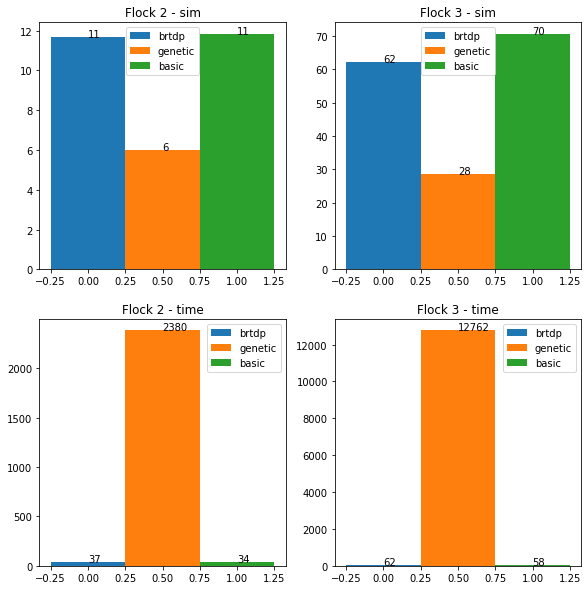

In [18]:
a,b,c,d,e,f = get_res()
plot_stuff(a,b,c,d,e,f,"Flock")

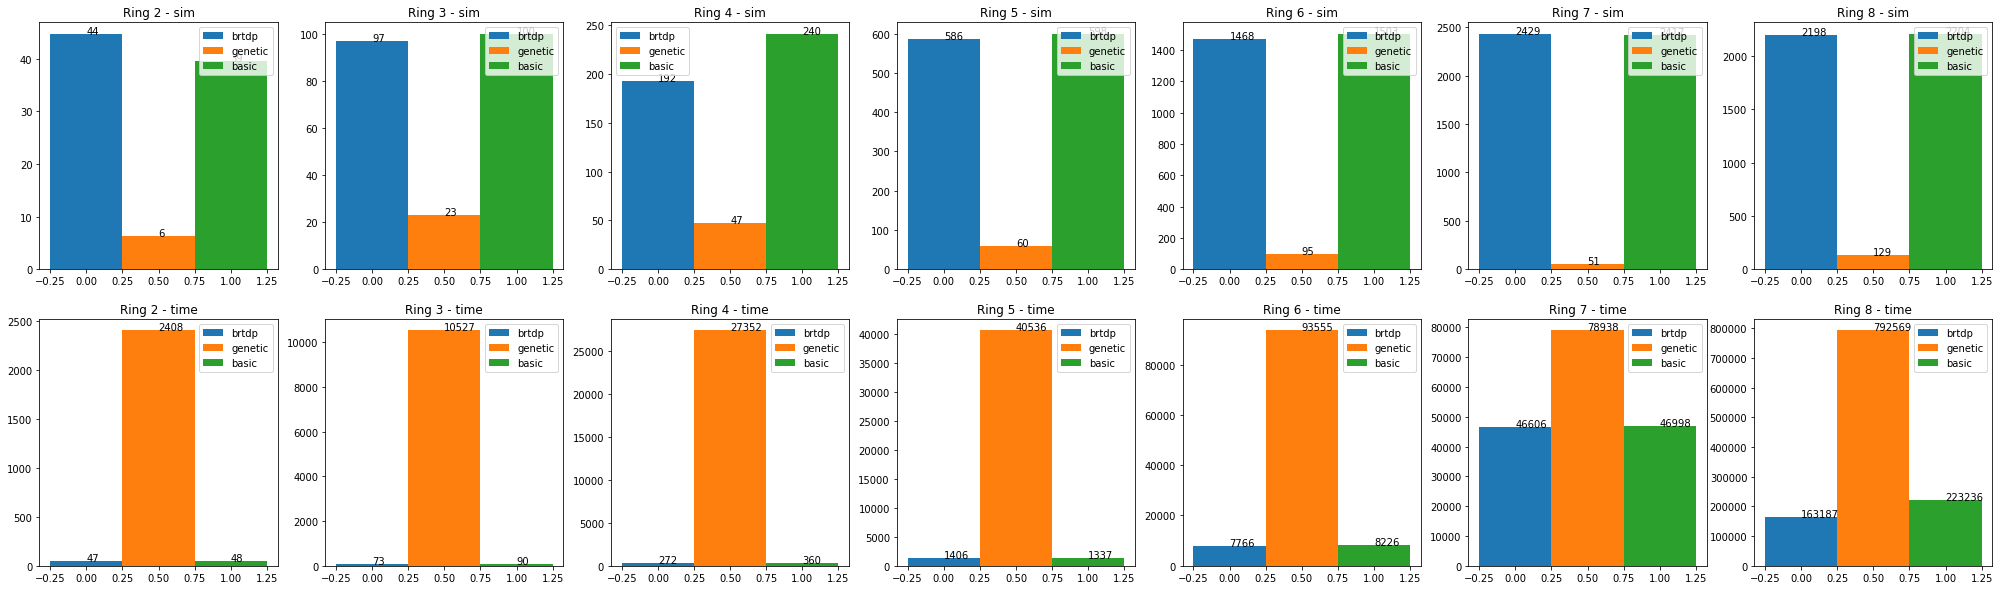

In [20]:
a,b,c,d,e,f = get_res("ring")
plot_stuff(a,b,c,d,e,f,"Ring")

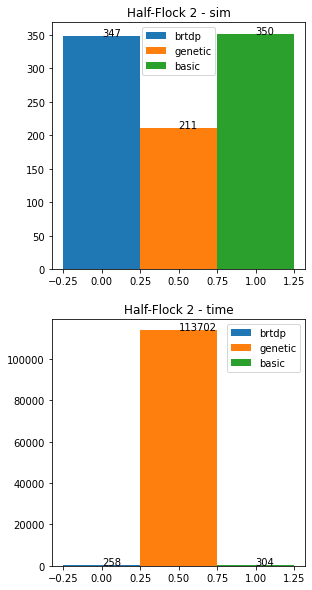

In [21]:
a,b,c,d,e,f = get_res("half-flock",[4,6])
plot_stuff(a,b,c,d,e,f,"Half-Flock")

[12.5, 72.16666666666667] [6.0] [36.833333333333336, 56.166666666666664] [2331.0]


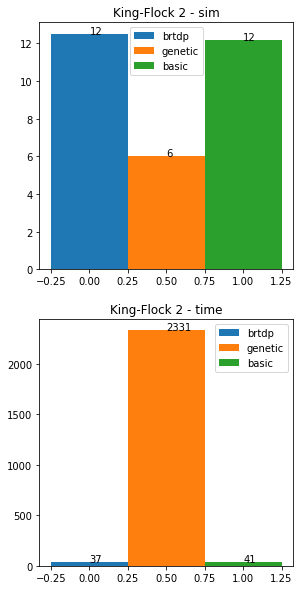

In [22]:
a,b,c,d,e,f = get_res("king-flock")
print(a,b,c,d)
plot_stuff(a,b,c,d,e,f,"King-Flock")

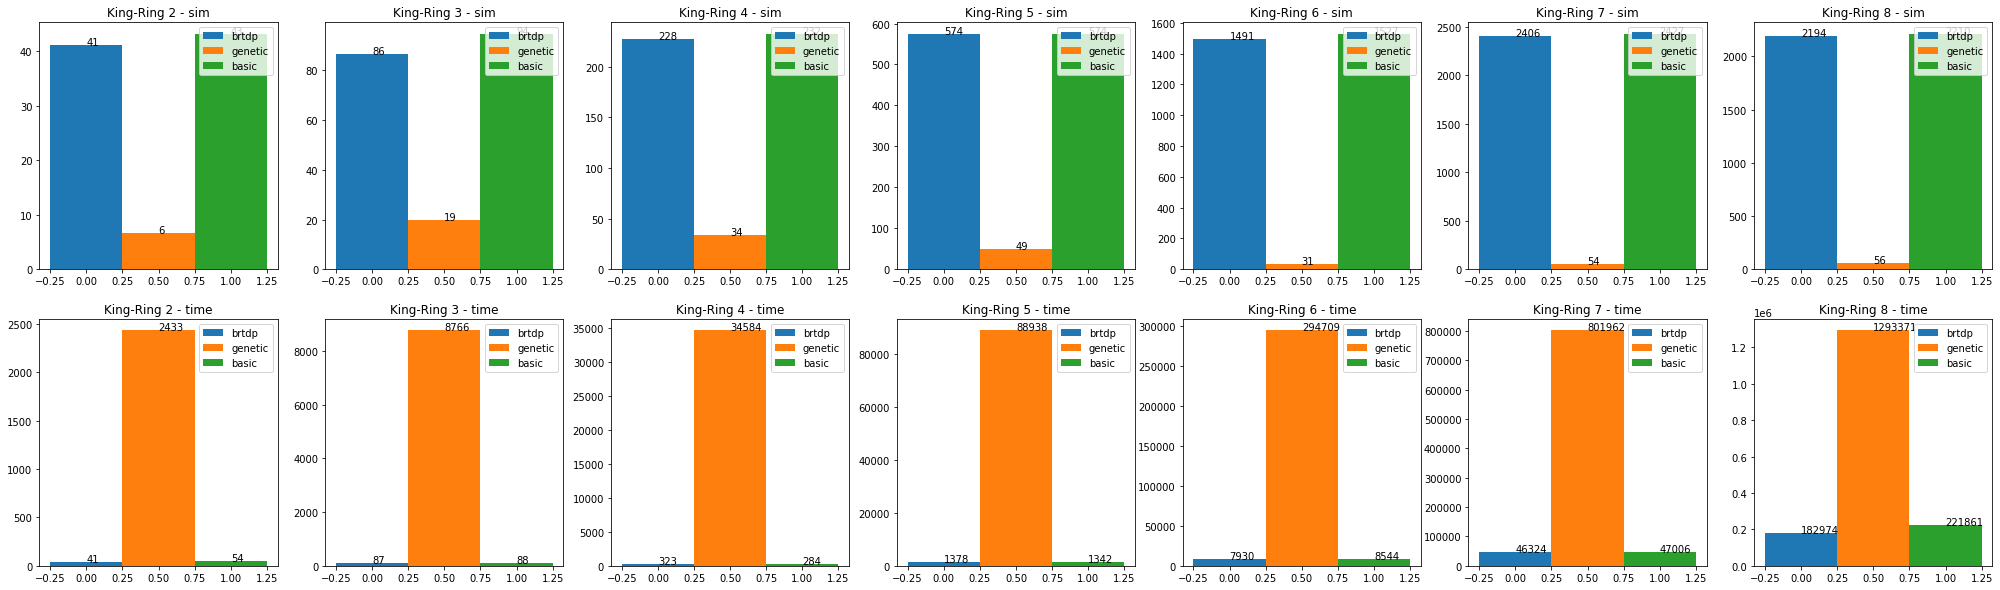

In [23]:
a,b,c,d,e,f = get_res("king-ring")
plot_stuff(a,b,c,d,e,f,"King-Ring")

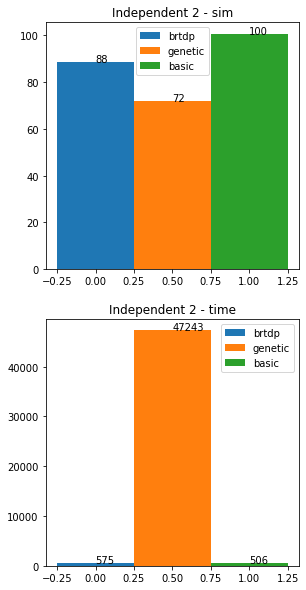

In [24]:
a,b,c,d,e,f = get_res("independent")
plot_stuff(a,b,c,d,e,f,"Independent")